In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil # 파일 복사
import data_prepro_method

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [7]:
name_list = ['긴소매',          # 0
            '니트_스웨터',      # 1
            '맨투맨',           # 2
            '민소매',           # 3
            '반소매',           # 4
            '셔츠_블라우스',    # 5
            '후드티',           # 6
            ]

In [8]:
# 데이터 불러오기
csv_path = 'csv/'

df_list = []
for name in name_list:
    df = pd.read_csv(f'{csv_path + name}.csv', index_col= 0)
    df_list.append(df.copy())

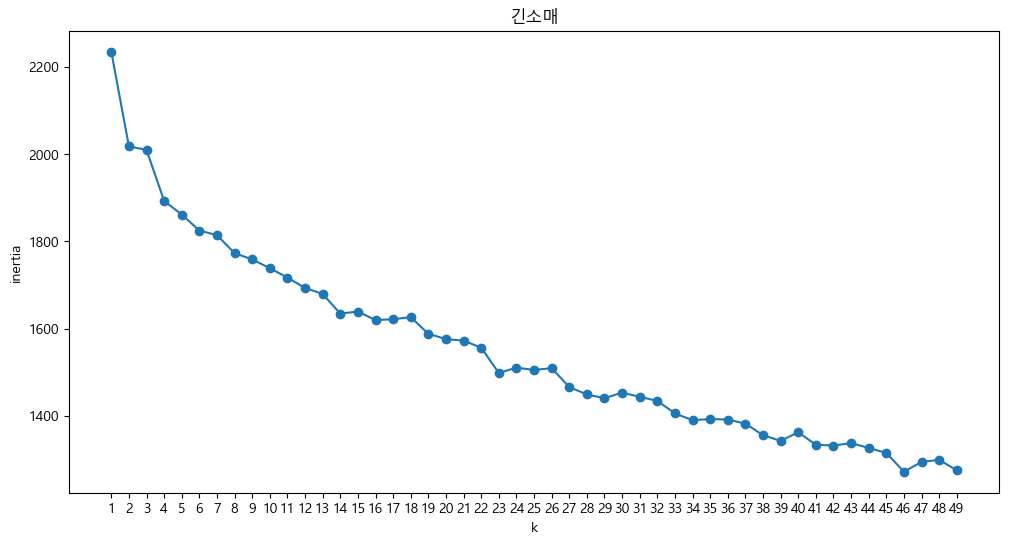

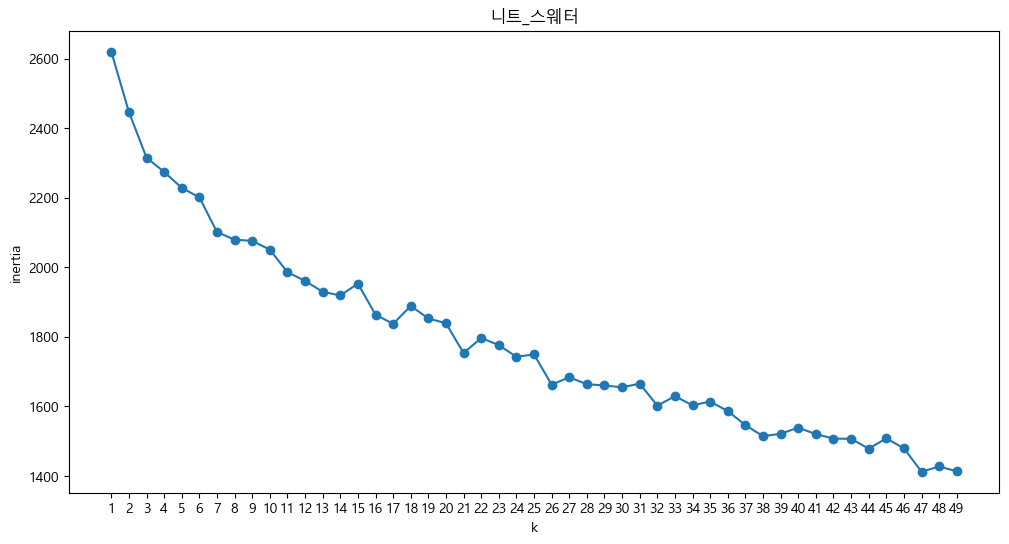

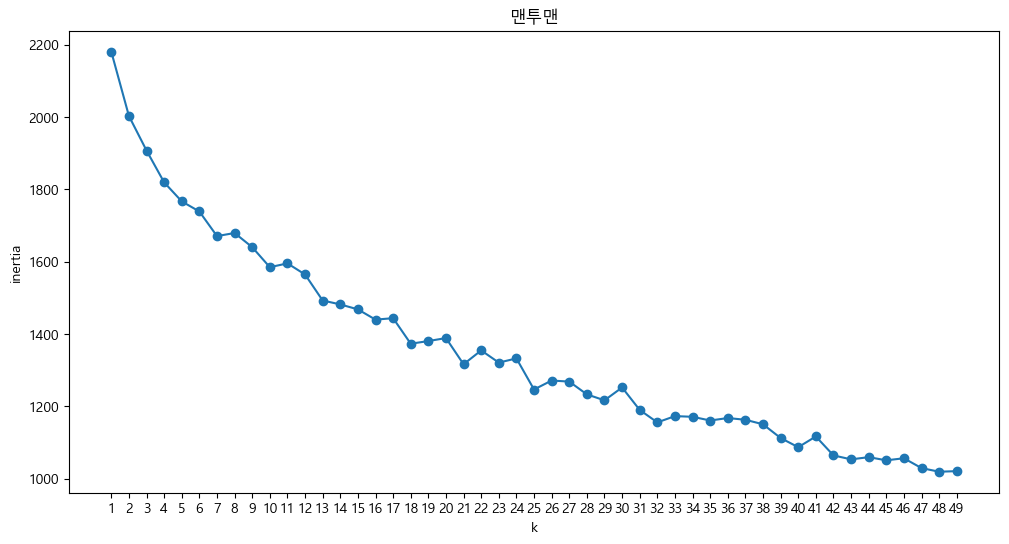

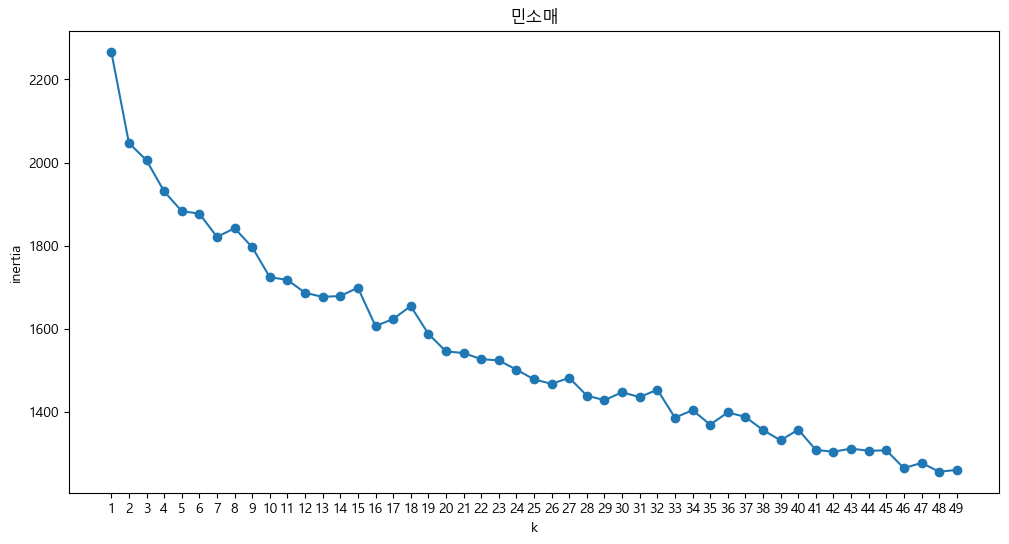

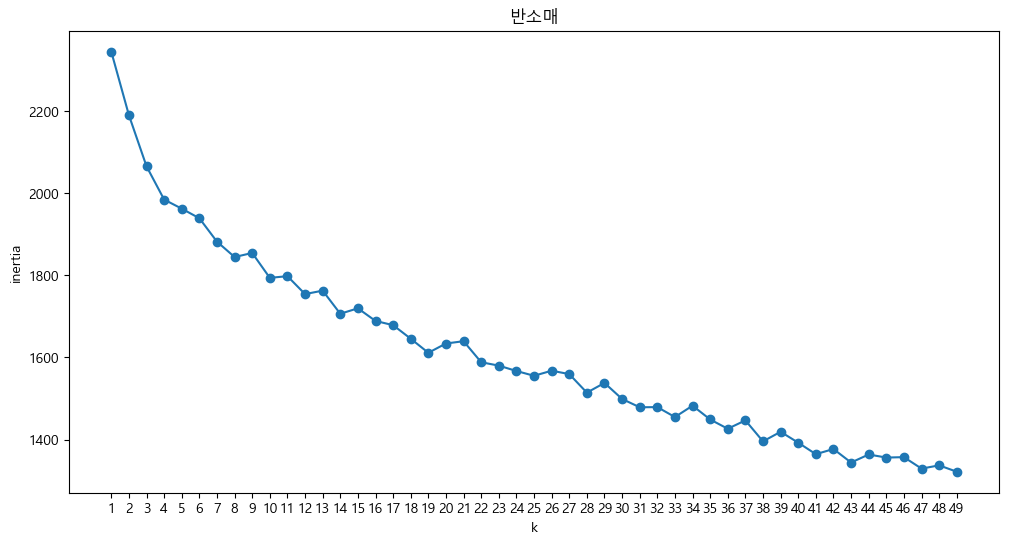

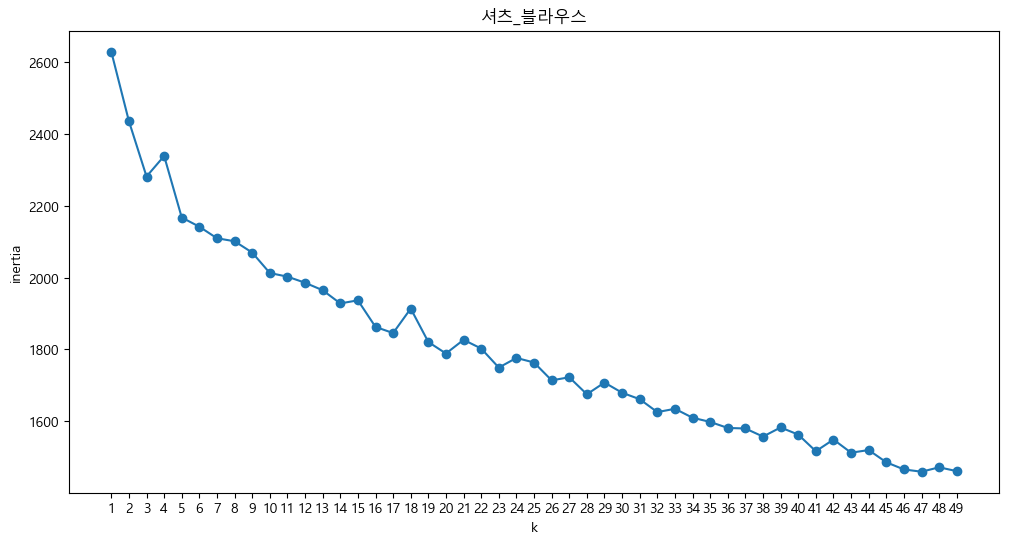

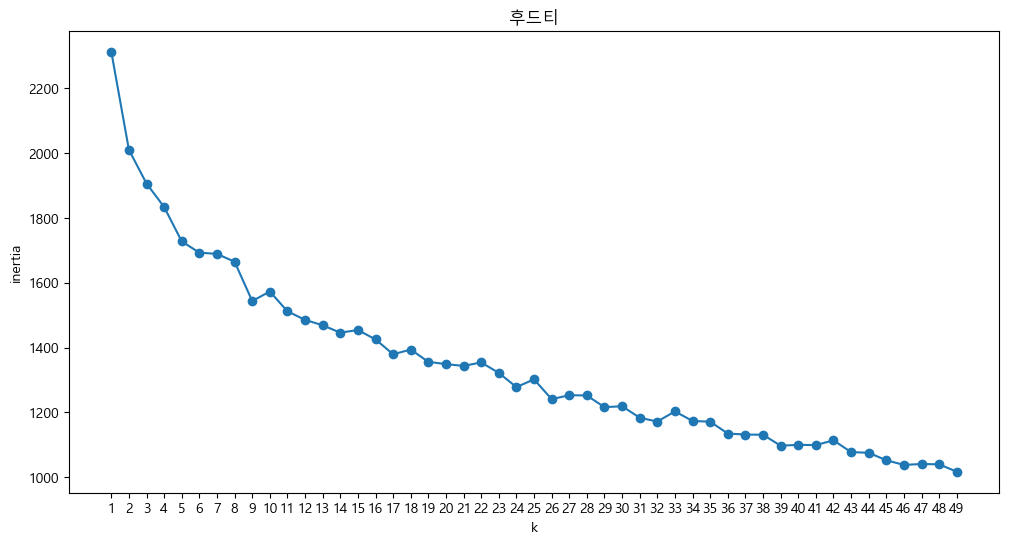

In [9]:
idx = 0

for df in df_list:
    # k 범위 설정
    k_range = range(1, 50)
    inertias = []

    for k in k_range:
        model = KMeans(n_clusters= k)
        model.fit(df)
        inertias.append(model.inertia_)

    plt.figure(figsize= (12,6))
    plt.plot(k_range, inertias, '-o')
    plt.title(f'{name_list[idx]}')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.xticks(k_range)

    idx += 1

plt.show()

In [10]:
a = [1, 2, 3]
b = np.array(a) + 1
c = list(b)
print(c)
print(type(c))

[2, 3, 4]
<class 'list'>
